In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Creating Model

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [3]:
training_data = np.load('TF_intro.npz')

input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 29.3929
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2794
Epoch 3/100
32/32 [==============================] - 0s 900us/step - loss: 0.4480
Epoch 4/100
32/32 [==============================] - 0s 873us/step - loss: 0.3940
Epoch 5/100
32/32 [==============================] - 0s 910us/step - loss: 0.3701
Epoch 6/100
32/32 [==============================] - 0s 944us/step - loss: 0.3789
Epoch 7/100
32/32 [==============================] - 0s 870us/step - loss: 0.3925
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3806
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3633
Epoch 10/100
32/32 [==============================] - 0s 997us/step - loss: 0.3651
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3517
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3928
Epoch 13/100
32/32 [====

32/32 [==============================] - 0s 892us/step - loss: 0.3952


# Extracting Values

In [4]:
model.layers[0].get_weights()

[array([[ 2.024781 ],
        [-2.9995613]], dtype=float32),
 array([4.9640174], dtype=float32)]

In [5]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.024781 ],
       [-2.9995613]], dtype=float32)

In [6]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9640174], dtype=float32)

In [7]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  8. ],
       [-12.6],
       [  6.4],
       [-41.4],
       [ 14.2],
       [-26.4],
       [ 28.2],
       [ 15.4],
       [ 17.2],
       [-10. ],
       [ 17.5],
       [ -4.3],
       [ 23.9],
       [-29.5],
       [  4.4],
       [ 15.7],
       [ 30. ],
       [-19.9],
       [ -8.2],
       [  0.9],
       [ -5.3],
       [  3.5],
       [ 23.8],
       [-23.5],
       [ 26.3],
       [ -0.2],
       [ 18.6],
       [ 51.8],
       [ -4.8],
       [ -5.8],
       [-15.8],
       [-11.1],
       [-16.9],
       [ 24.1],
       [ -8.7],
       [ 11.4],
       [  3.5],
       [-29.7],
       [ 47.4],
       [ 15.8],
       [ 20.6],
       [-16. ],
       [-27.4],
       [ -3. ],
       [  2.3],
       [ 31.3],
       [ 40.8],
       [ -1.8],
       [-10.2],
       [  5.8],
       [ -1.1],
       [ -3.8],
       [ 17.5],
       [-33.3],
       [  6.7],
       [ -6.3],
       [ -6.7],
       [  5. ],
       [-23.2],
       [  8.8],
       [-25.5],
       [ 30.6],
       [

In [8]:
training_data['targets'].round(1)

array([[  7.7],
       [-12.3],
       [  7.4],
       [-41.8],
       [ 13.5],
       [-26.7],
       [ 27.3],
       [ 14.4],
       [ 17.7],
       [ -9.6],
       [ 18.3],
       [ -4.1],
       [ 24. ],
       [-29.2],
       [  3.6],
       [ 15.7],
       [ 29.8],
       [-19.3],
       [ -8.5],
       [  0.1],
       [ -5.4],
       [  4.5],
       [ 23. ],
       [-24.2],
       [ 26.8],
       [ -1. ],
       [ 18.2],
       [ 51.1],
       [ -4.2],
       [ -5.4],
       [-16. ],
       [-10.5],
       [-16.2],
       [ 24.7],
       [ -9.2],
       [ 11.9],
       [  2.8],
       [-29.5],
       [ 46.4],
       [ 15.4],
       [ 20.6],
       [-15.5],
       [-27.1],
       [ -3.1],
       [  2.7],
       [ 32.3],
       [ 40.8],
       [ -2.1],
       [-10.1],
       [  6.4],
       [ -0.4],
       [ -3.1],
       [ 17.5],
       [-32.2],
       [  7.5],
       [ -5.7],
       [ -5.7],
       [  5.9],
       [-23.4],
       [  8.8],
       [-25. ],
       [ 30.9],
       [

# Graph

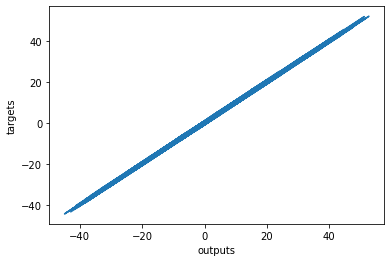

In [9]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()